# DS-7331 Machine Learning Project 1
## Airbnb Price Data
### Allen Miller, Ana Glaser, Jake Harrison, Lola Awodipe

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [50]:
pdata = pd.read_csv("airbnb.csv")

### Business Understanding

#### Write Up

In [3]:
#Code

In [4]:
pdata = pdata.fillna(pdata.median())

### Data Meaning Type

#### Write Up

In [5]:
#Code

## Data Quality

#### Write Up

In [6]:
#Code 
#Code check for missing values and duplicates, fix data

In [7]:
pdata = pdata.fillna(pdata.median())
pdata = pdata.dropna()
pdata = pdata.drop_duplicates()

In [8]:
pdata['price'] = np.exp(pdata.log_price)

In [9]:
dupCount = pdata.duplicated()
sum(dupCount)

0

In [51]:
pdata.nunique()

id                        74111
log_price                   767
property_type                35
room_type                     3
accommodates                 16
bathrooms                    17
bed_type                      5
cancellation_policy           5
cleaning_fee                  2
city                          6
description               73474
first_review               2554
host_has_profile_pic          2
host_identity_verified        2
host_response_rate           80
host_since                 3087
instant_bookable              2
last_review                1371
latitude                  74058
longitude                 73973
neighbourhood               619
number_of_reviews           371
review_scores_rating         54
zipcode                     669
bedrooms                     11
beds                         18
dtype: int64

## Simple Statistics

#### Write Up

In [10]:
#Code

## Visualize Attributes

#### Room Type

When evaluating room type, it was important to note that there is a significantly more private rooms and entire homes in the dataset versus shared rooms.  This is important to note for future analysis because we need to understand whether we will lack predictive power or lack in our classification accuracy due to the lack of balance in the dataset.

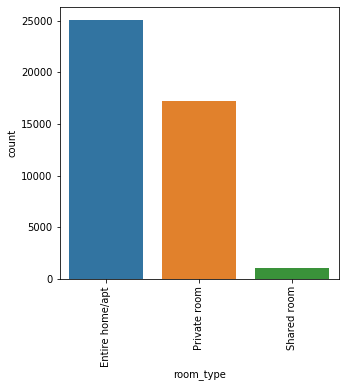

In [11]:
#Code
#Looking at the distribution of Room Type
plt.figure(figsize=(5,5))
sns.countplot(pdata['room_type'])
plt.xticks(rotation=90)
plt.show()

#### Property Type

The property type attribute had 35 unique values, and this level of detail made it difficult to visualize.  In order to understand the data at a higher level, we consolidated the data into two main property types and labeled the rest as "other", we may revisit this encoding as we experiment with feature selection for regression and classification

In [16]:
#original
pdata['property_type_original'] = pdata['property_type']


#value_list = ["Apartment","House","Condominium","Loft","Townhouse"]
value_list = ["Apartment","House"]
boolean_series = ~pdata.property_type.isin(value_list)
filtered_df = pdata[boolean_series]

filtered_df.head(100)

for i in list (filtered_df.index):
    pdata.loc[i,'property_type'] = "other"

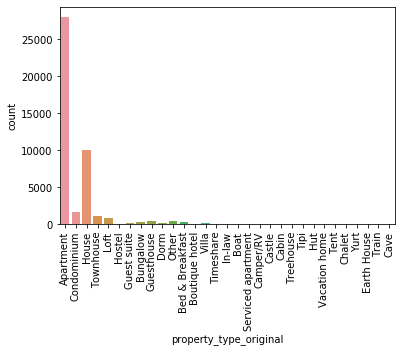

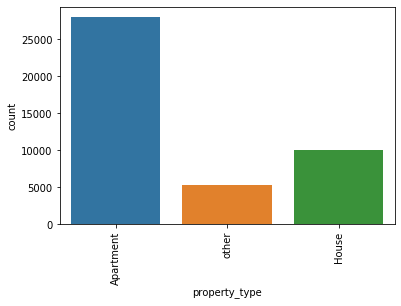

In [48]:
for i in ['property_type_original','property_type']:
    sns.countplot(pdata[i])
    plt.xticks(rotation=90)
    plt.show()

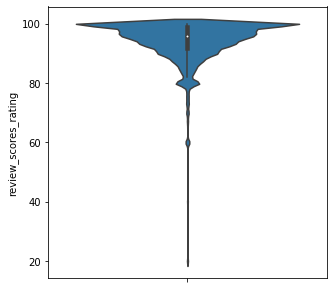

In [12]:
plt.figure(figsize=(5,5))
sns.violinplot(y=pdata.review_scores_rating)
plt.show()

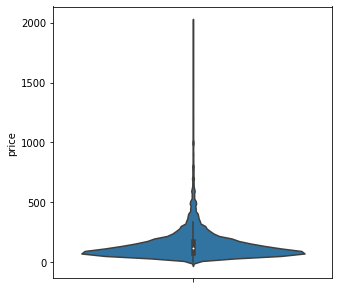

In [13]:
plt.figure(figsize=(5,5))
sns.violinplot(y=pdata.price)
plt.show()

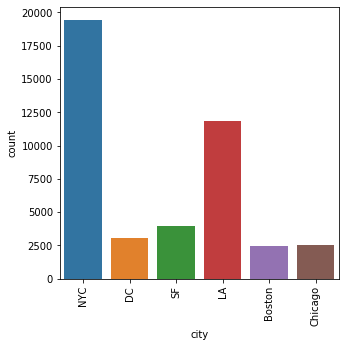

In [47]:
#Looking at the distribution of City
plt.figure(figsize=(5,5))
sns.countplot(pdata['city'])
plt.xticks(rotation=90)
plt.show()

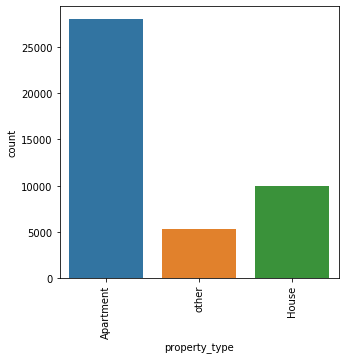

In [17]:
#Looking at the distribution of the entire list of property types
plt.figure(figsize=(5,5))
sns.countplot(pdata['property_type'])
plt.xticks(rotation=90)
plt.show()

In [18]:
#subset of data for reporting purposes

pdata_mod = pdata.drop(['cancellation_policy', 'description', 'first_review', 'host_has_profile_pic',
                'host_response_rate', 'host_since', 'last_review', 'cleaning_fee', 'latitude', 'longitude', 'id'], axis=1)

pdata_mod = pdata_mod.dropna()
#pdata_mod.info()

## Explore Joint Attributes

We start by looking at the distribution of the log_price variable and find that it is mostly normally distributed. This should help us when we go to predict what the price of the Airbnb will be. 

The number_of _reviews appears to be normally distributed when compared with log_price. This means that most of the reviews are coming from those who are spending about average on the Airbnb rate. This is probably due to this being the most common price range for Airbnb listing and thus allows for a higher number of people to submit reviews.

It also appears that there may be a relationship between the number_of_reviews and the accomodates factor. The smaller the value for accomodates the more reviews an Airbnb seems to have.

We can see a positive relationship between the review_scores_rating and almost all variables included in the below pairs plot. This would make sense that the more accomidating, the more beds, and the more baths a place has the more high reviews that place would receive.

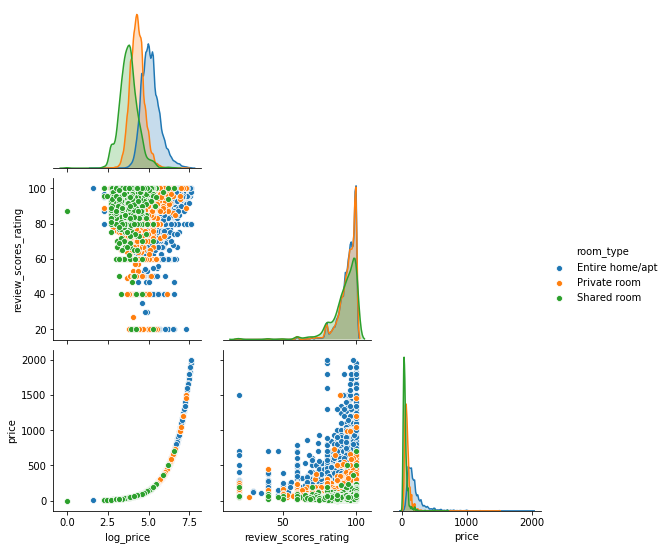

In [19]:
sns.pairplot(pdata,vars=pdata_mod[['log_price','review_scores_rating', 'price']], hue = "room_type" ,diag_kind = 'kde', corner = True)

#https://seaborn.pydata.org/generated/seaborn.pairplot.html

In [20]:
#sns.pairplot(pdata_mod)

## Explore Attributes and Class

We first looked at the relationship between the log_price and the review_scores_rating. There doesn't appear to be a lot of evidence of linear correlation between the two variable, however, we can see that not many low scores are associated with high price.

Next our heatmap shows us the correlation value between all of our variables. Specifically we are looking at the correlation between log_price and our other variabels. We can see a medium correlation (between 0.4 and 0.6) when log_price is compared with accommodates, bathrooms, bedrooms, and beds. These all make sense to be positively correlated with the price of an Airbnb. It is, however, interesting that the longitude and latitude of a property didn't play a major role in price as these would indicate where a property is located and location typically influences price.

Looking at the distribution of log_price across the 6 different cities contained in the data set we see that there is not a large discrepence in pricing in the various cities. Though the median is different in the 6 cities, the distributions mostly the same ranges and a different sample could potentially yeild more observations that are more equal.

We then looked at how the property_type (broken into the three categories Apartment, House, and Other) interacted with cleaning_fee (T/F). We can see that all 3 property types share similar proportions between having a cleaning fee and not. This means that using cleaning fee to predict the property type won't yeild us the best results and we need to explore other interactions.

Finally we looked at how the accommodates value and the property type would interact. Once agian we see similar distributions across the 3 types with the range being nearly identical on all 3. This may be more useful to predict with than the cleaning_fee, but we would still have issues distinguishing between the Apartment and Other property_types.

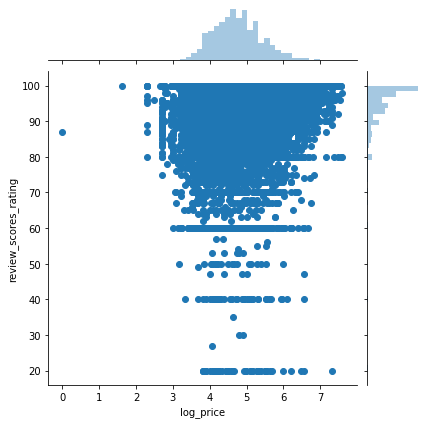

In [21]:
sns.jointplot(pdata['log_price'],pdata['review_scores_rating']);

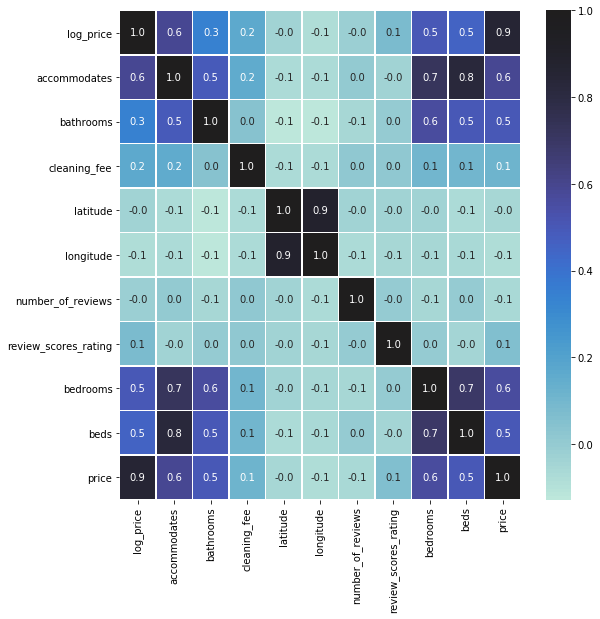

In [22]:
mydata = pdata.iloc[:, 1:27]
plt.figure(figsize=(9,9))
sns.heatmap(mydata.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

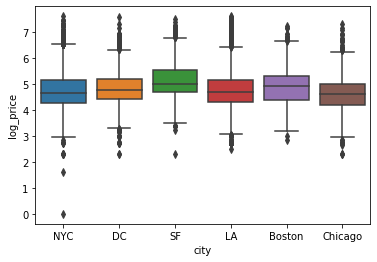

In [23]:
sns.boxplot(x='city', y='log_price', data=pdata)

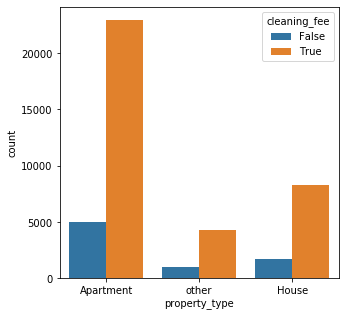

In [24]:
plt.figure(figsize=(5,5))
#sns.countplot(pdata['beds'], hue="property_type")
sns.countplot(x="property_type", hue="cleaning_fee", data=pdata)

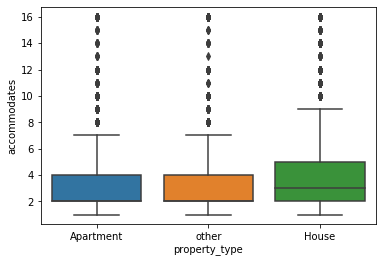

In [25]:
sns.boxplot(x="property_type", y="accommodates", data=pdata)

## New Features

Creating a new variable based off of the region in the united states that the property is located could potentially yield interesting results. Though the individual cities may not drastically contribute to price, it is possible that grouped into a region we could see a little bit more definition between values.

Trying to find the age of the property would help as well in identifying both the price and the city that the property is located in. People are more likely to pay a higher price for a newer Airbnb than an older one except in the rare occasions that the property is an antique.

Finally finding the avg monthly temp of the properties could yeild great results in determining which city each property belongs to. We could potentially use this as well to predict pricing, however, it would not correlate as well as some of our other predictors do.

## Exceptional Work

#### Write Up

In [26]:
#https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [27]:
num_columns = ['log_price', 'bathrooms', 'latitude', 'longitude',
       'review_scores_rating', 'bedrooms', 'beds', 'price']
target = ['price']
target2 = ['property_type']

x = pdata.loc[:,num_columns].values
y = pdata.loc[:,target].values
z = pdata.loc[:,target2].values

In [28]:
#scale the data
x = StandardScaler().fit_transform(x)

#build PCA and print eigen vectors
pca = PCA(n_components=8)
pca_model = pca.fit(x)
print(pca_model.components_)

[[ 0.4393286   0.39750174 -0.11029644 -0.123473    0.02350388  0.45677344
   0.43311936  0.47411505]
 [ 0.09229434 -0.00170604  0.69569586  0.69138948 -0.06801843  0.10058732
   0.07917995  0.09193977]
 [-0.25003263  0.15585182 -0.05390374 -0.01875774 -0.90341159  0.12942666
   0.20674176 -0.18517697]
 [ 0.5432649  -0.42265525 -0.02421079 -0.06700851 -0.41636259 -0.29501198
  -0.30391029  0.41036344]
 [-0.03405549  0.76841956  0.03846743  0.04147628 -0.06157805 -0.29170114
  -0.53335737  0.17838185]
 [-0.05777833 -0.13750637  0.0171476  -0.05248281 -0.03605426  0.76863037
  -0.61838291 -0.01466966]
 [-0.63483204 -0.17108622 -0.1749652   0.16481203  0.01391598 -0.01665989
   0.04009434  0.71264522]
 [-0.1825082  -0.02037379  0.68407864 -0.68575162 -0.00503361 -0.03601584
   0.05059125  0.15548263]]


In [29]:
print(pca_model.explained_variance_ratio_)
varianceExplained = pca_model.explained_variance_ratio_
cum_varianceExplained = np.cumsum(varianceExplained)

[0.40608527 0.23275016 0.12998993 0.09984081 0.06551623 0.03631555
 0.0158666  0.01363545]


In [30]:
print(varianceExplained)
print(cum_varianceExplained)

[0.40608527 0.23275016 0.12998993 0.09984081 0.06551623 0.03631555
 0.0158666  0.01363545]
[0.40608527 0.63883543 0.76882536 0.86866617 0.9341824  0.97049795
 0.98636455 1.        ]


<BarContainer object of 8 artists>

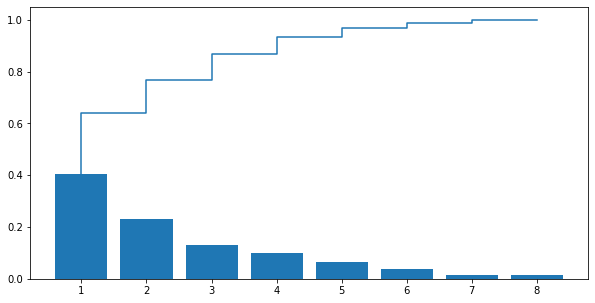

In [31]:
plt.figure(figsize=(10,5))
plt.step(range(1,varianceExplained.size+1),cum_varianceExplained, label='')
plt.bar(range(1,cum_varianceExplained.size+1),varianceExplained, label='')

<BarContainer object of 8 artists>

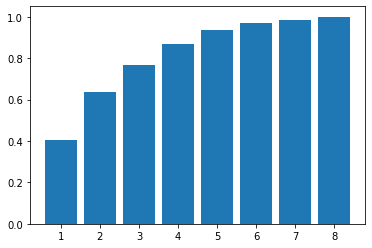

In [32]:
plt.bar(range(1,cum_varianceExplained.size+1),cum_varianceExplained)

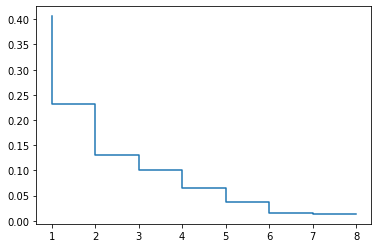

In [33]:
plt.step(range(1,varianceExplained.size+1),varianceExplained)